In [1]:
import yt
import numpy as np
from scipy import *
import yt.units as u

In [2]:
my_header =  ['raw_density', 'x-velocity','y-velocity','z-velocity', 'pressure_nt',
                  'raw_pressure','metallicity','ref','H','E','H+','HE','HE+','HE++','H-','H2','H2+']

In [4]:
def density_alias(field, data):
    return data.ds.arr(data['raw_density'], 'code_mass/code_length**3')
def pressure_alias(field, data):
    return data.ds.arr(data['raw_pressure'], 'code_mass/code_time**2/code_length')

In [5]:
ds = yt.load("output_00028/info_00028.txt",fields=my_header)

yt : [INFO     ] 2018-07-21 11:25:07,098 Parameters: current_time              = 3.17276944493
yt : [INFO     ] 2018-07-21 11:25:07,099 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-07-21 11:25:07,100 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2018-07-21 11:25:07,101 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2018-07-21 11:25:07,103 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-07-21 11:25:07,104 Parameters: current_redshift          = 5.99989573952965
yt : [INFO     ] 2018-07-21 11:25:07,106 Parameters: omega_lambda              = 0.691999971866608
yt : [INFO     ] 2018-07-21 11:25:07,107 Parameters: omega_matter              = 0.30799999833107
yt : [INFO     ] 2018-07-21 11:25:07,109 Parameters: hubble_constant           = 0.677900009155273


In [6]:
ds.add_field('density', function=density_alias, units='g/cm**3',
             sampling_type='cell',force_override=True)
ds.add_field('pressure', function=pressure_alias, units='g/cm/s**2',
             sampling_type='cell',force_override=True)

In [7]:
center_init = [ 0.53095117,  0.51029149,  0.50401411]
los_vec = [ 0.9,    0.3082207, 0.3082207]
mms = 512
size = 0.00166389148881
size_kpc = 7.0
up_vec = [ 0.3082207,  0.9, 0.3082207]

yt : [INFO     ] 2018-07-21 11:26:06,006 Projection completed
yt : [INFO     ] 2018-07-21 11:26:06,008 xlim = 0.004014 1.004014
yt : [INFO     ] 2018-07-21 11:26:06,009 ylim = 0.030951 1.030951
yt : [INFO     ] 2018-07-21 11:26:06,010 xlim = 0.004014 1.004014
yt : [INFO     ] 2018-07-21 11:26:06,011 ylim = 0.030951 1.030951
yt : [INFO     ] 2018-07-21 11:26:06,016 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2018-07-21 11:26:06,285 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



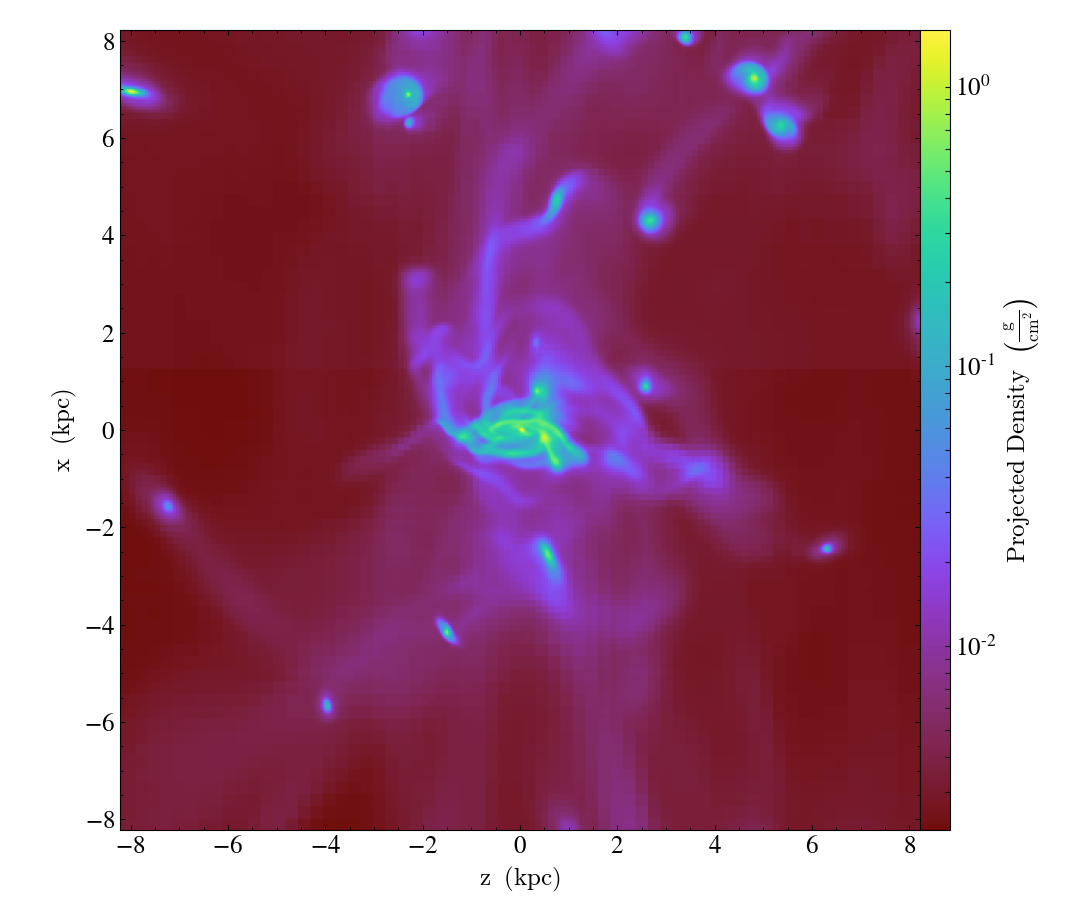

In [9]:
p = yt.ProjectionPlot(ds,'y','density',center_init)
#p.annotate_grids()
p.zoom(256)

In [60]:
# Thomson scattering cross section
sigma_t = yt.YTQuantity(6.6524e-25,'cm**2')

1.6737352238051868e-24 g

In [11]:
# random sampling of ray direction
num_rays = 10
rtheta = np.arccos(1-2*np.random.rand(num_rays))
rphi = np.random.rand(num_rays)*2*pi

In [57]:
# radius of the ray path
radius = np.array(10*u.kpc/ds.domain_width.in_units('kpc')[0]/(1+ds.current_redshift))

In [63]:
# loop to sample light rays
tau = []
for i in range(num_rays):
    theta = rtheta[i]
    phi = rphi[i]
    endpos = center_init + radius*[sin(theta)*cos(phi), sin(theta)*sin(phi), cos(phi)]
    ray = ds.ray(center_init, endpos)
    dens_col=np.sum(ray['density']*ray['dx'])/u.mass_hydrogen
    tau.append(dens_col*sigma_t)
    #print(col_dens.in_cgs())
tau = yt.YTArray(tau)

In [64]:
tau.in_cgs()

YTArray([ 0.1720682 ,  0.33083699,  0.46503631,  1.47517277,  0.16428174,
        0.51704877,  0.547723  ,  0.37186794,  0.16419557,  0.20974415]) (dimensionless)

yt : [INFO     ] 2018-07-21 10:50:41,111 Projection completed
yt : [INFO     ] 2018-07-21 10:50:41,112 xlim = 0.010291 1.010291
yt : [INFO     ] 2018-07-21 10:50:41,112 ylim = 0.004014 1.004014
yt : [INFO     ] 2018-07-21 10:50:41,114 xlim = 0.010291 1.010291
yt : [INFO     ] 2018-07-21 10:50:41,115 ylim = 0.004014 1.004014
yt : [INFO     ] 2018-07-21 10:50:41,118 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2018-07-21 10:50:41,334 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



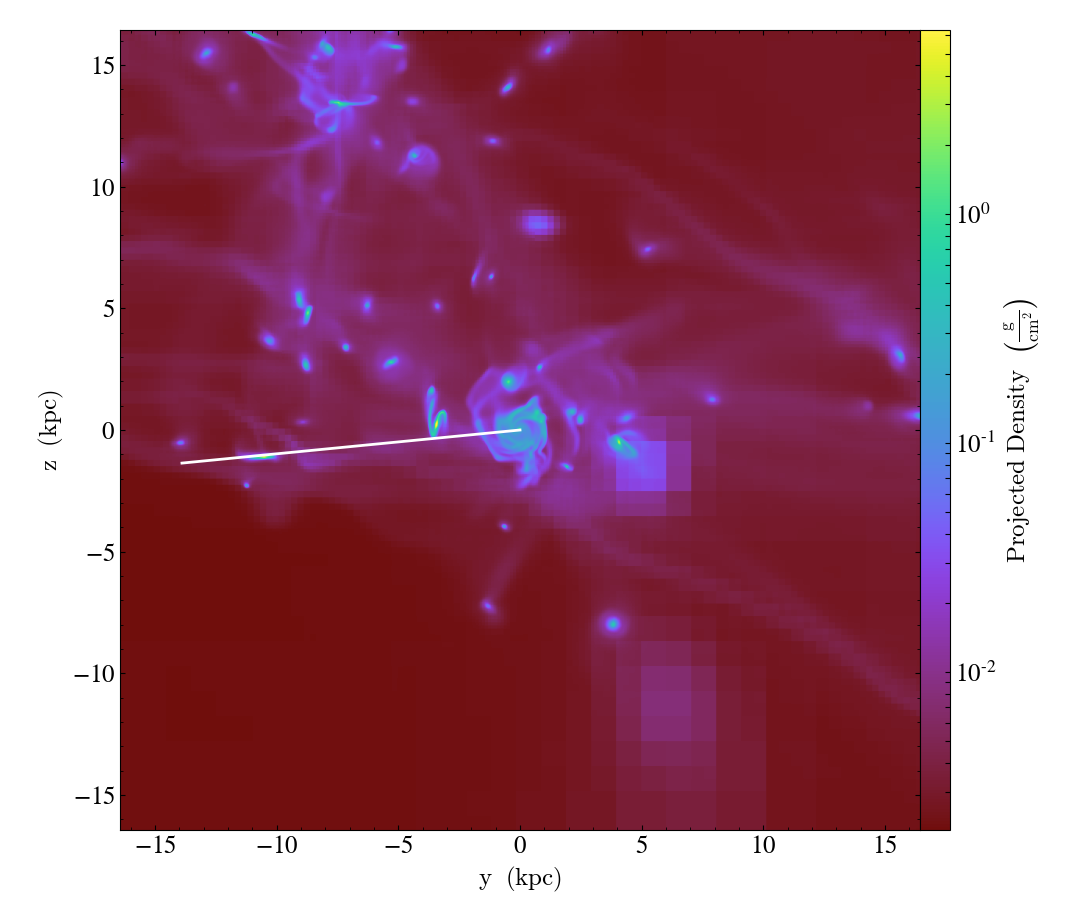

In [33]:
p = yt.ProjectionPlot(ds,'x','density',center_init)
#p = yt.SlicePlot(ds, 'y', 'density',center_init)
p.annotate_ray(ray)
p.zoom(128)